In [1]:
from pathlib import Path
import h5py as h5
import numpy as np
from matplotlib import pyplot as plt

In [6]:
def get_iterate(path=Path("../examples/output/parareal/"), n=0):
    files = path.glob(f"fine-{n:04}-*.h5")
    
    def read_snap(filename):
        with h5.File(filename, "r") as f_in:
            n = f_in["data"].attrs["n"]
            t0 = f_in["data"].attrs["t0"]
            t1 = f_in["data"].attrs["t1"]
            t = np.linspace(t0, t1, n + 1)
            data = f_in["data"][:]
            return t, data
        
    snaps = [read_snap(f) for f in sorted(files)]
    t = np.concatenate([s[0] for s in snaps], axis=0)
    x = np.concatenate([s[1] for s in snaps], axis=0)
    return t, x

In [7]:
t_euler, x_euler = get_iterate(path=Path("../examples/output/euler/"))

In [31]:
def iterate_to_table(n, dat):
    fields = [("iteration", int), ("time", float), ("q", float), ("p", float)]
    return np.core.records.fromarrays(
        [np.full(dat[0].shape, n, dtype=int), dat[0], dat[1][:,0], dat[1][:,1]],
        dtype=fields)

In [127]:
data = pd.DataFrame(np.concatenate([iterate_to_table(i, get_iterate(n=i)) for i in range(1, 16)]))

In [128]:
from plotnine import ggplot, geom_point, geom_line, aes, facet_wrap, ggtitle, theme_dark, theme_gray, element_rect, theme, element_text, ylim

In [129]:
plot = ggplot(data.query("iteration in [1, 5, 10, 15]"), aes(x="time", y="q", group="iteration")) \
    + geom_line() + facet_wrap("iteration", labeller="iteration {}".format) + ggtitle("$\zeta$ = 0.6") \
    + ylim(-0.5, 1.1) \
    + theme_dark(base_family="Cantarell") \
    + theme(text=element_text(color="white"), plot_background=element_rect(fill='gray', alpha=0.0))

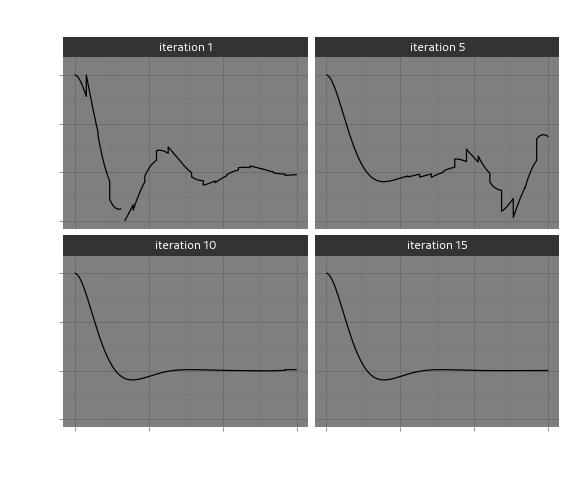

<ggplot: (8772578710219)>

In [130]:
plot

In [131]:
plot.save(filename="zeta06.svg")

/home/johannes/.cache/pypoetry/virtualenvs/parareal-_jpDvw2Z-py3.10/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/johannes/.cache/pypoetry/virtualenvs/parareal-_jpDvw2Z-py3.10/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: zeta06.svg


![](zeta05.svg)